# General Overview - Data Visualization

Using a clean dataset, we look for correlations between the independent variables and the target variable, the likelihood of being readmitted to the hospital, using graphs and plots. This is also a good time to get a better understanding of patient demographics, their experiences at the hospital, what medications are / are not using, and their diagnosed conditions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

/Users/annatang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('diabetes_cleaned.csv', index_col=0) # import data
diabetes = data.copy() # save a copy of data as diabetes

In [3]:
diabetes.head(10)

,patient_nbr,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type
0,8222157,Caucasian,Female,[0-10),Unknown,1,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,NO,Unknown
1,55629189,Caucasian,Female,[10-20),Home,7,3,Unknown,59,0,...,No,No,Up,No,No,No,Ch,Yes,YES,Emergency
2,86047875,AfricanAmerican,Female,[20-30),Home,7,2,Unknown,11,5,...,No,No,No,No,No,No,No,Yes,NO,Emergency
3,82442376,Caucasian,Male,[30-40),Home,7,2,Unknown,44,1,...,No,No,Up,No,No,No,Ch,Yes,NO,Emergency
4,42519267,Caucasian,Male,[40-50),Home,7,1,Unknown,51,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Emergency
5,82637451,Caucasian,Male,[50-60),Home,2,3,Unknown,31,6,...,No,No,Steady,No,No,No,No,Yes,YES,Urgent
6,84259809,Caucasian,Male,[60-70),Home,2,4,Unknown,70,1,...,No,No,Steady,No,No,No,Ch,Yes,NO,Elective
7,114882984,Caucasian,Male,[70-80),Home,7,5,Unknown,73,0,...,No,No,No,No,No,No,No,Yes,YES,Emergency
8,48330783,Caucasian,Female,[80-90),Home,4,13,Unknown,68,2,...,No,No,Steady,No,No,No,Ch,Yes,NO,Urgent
9,63555939,Caucasian,Female,[90-100),Hospital,4,12,InternalMedicine,33,3,...,No,No,Steady,No,No,No,Ch,Yes,NO,Elective


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67874 entries, 0 to 67873
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               67874 non-null  int64 
 1   race                      67874 non-null  object
 2   gender                    67874 non-null  object
 3   age                       67874 non-null  object
 4   discharge_disposition_id  67874 non-null  object
 5   admission_source_id       67874 non-null  int64 
 6   time_in_hospital          67874 non-null  int64 
 7   medical_specialty         67874 non-null  object
 8   num_lab_procedures        67874 non-null  int64 
 9   num_procedures            67874 non-null  int64 
 10  num_medications           67874 non-null  int64 
 11  number_outpatient         67874 non-null  int64 
 12  number_emergency          67874 non-null  int64 
 13  number_inpatient          67874 non-null  int64 
 14  diag_1                

Columns use num and number in their names, so to keep them consistent, all columns will use num.

In [5]:
diabetes = diabetes.rename(columns={'number_outpatient':'num_outpatient', 
                                    'number_emergency':'num_emergency', 
                                    'number_inpatient':'num_inpatient', 
                                    'number_diagnoses':'num_diagnoses'})

In [6]:
# drop the patient number column since each patient is unique
diabetes = diabetes.drop(columns=['patient_nbr'])

In [7]:
round(diabetes.describe(), 2)

,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses
count,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00
mean,4.42,4.28,42.85,1.43,15.67,0.28,0.11,0.18,7.25
std,2.97,2.94,19.93,1.76,8.28,1.07,0.52,0.61,1.99
min,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,1.00,2.00,31.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,7.00,3.00,44.00,1.00,14.00,0.00,0.00,0.00,8.00
75%,7.00,6.00,57.00,2.00,20.00,0.00,0.00,0.00,9.00
max,25.00,14.00,132.00,6.00,81.00,42.00,42.00,12.00,16.00


# readmitted patients overall

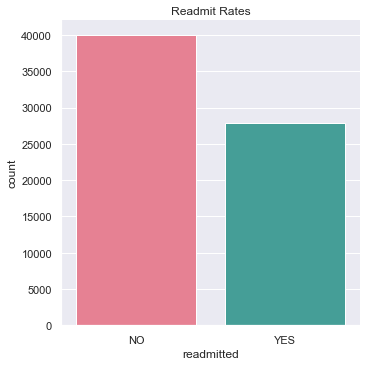

In [8]:
sns.catplot(x='readmitted', kind='count', palette='husl', data=diabetes)
plt.title('Readmit Rates')
plt.show()

In [9]:
round(diabetes.readmitted.value_counts(normalize=True), 4) * 100

NO     58.93
YES    41.07
Name: readmitted, dtype: float64

59% of patients are not readmitted while 41% of patients are readmitted within or after 30 days.

In [10]:
# shows the numbers for each comparison and their totals
def chart_display(x, y):
    return pd.crosstab(x, y, margins=True, margins_name='Total')

# patient demographics, gender, and age

## demographics

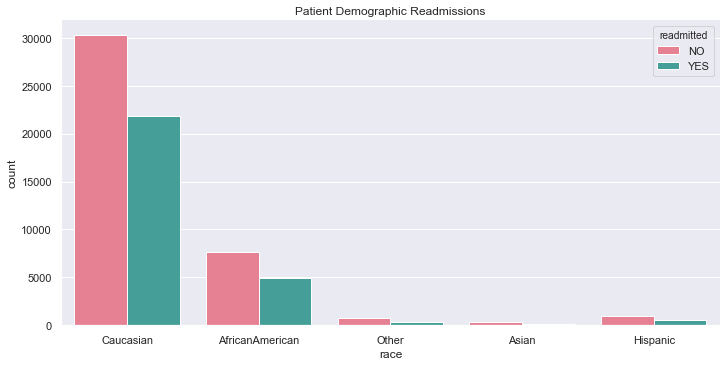

In [11]:
sns.catplot(x='race', hue='readmitted', kind='count', palette='husl', data=diabetes, aspect=2, legend_out=False)
plt.title('Patient Demographic Readmissions')
plt.show()

In [12]:
chart_display(diabetes.race, diabetes.readmitted)

readmitted,NO,YES,Total
race,,,
AfricanAmerican,7638,4956,12594
Asian,340,148,488
Caucasian,30299,21849,52148
Hispanic,964,531,1495
Other,759,390,1149
Total,40000,27874,67874


## gender

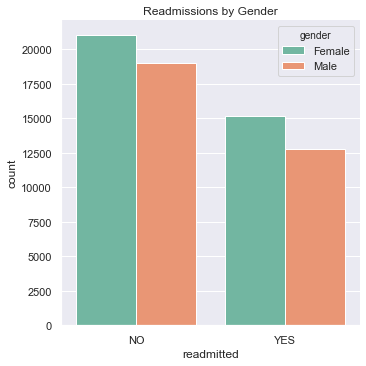

In [13]:
sns.catplot(x='readmitted', hue='gender', kind='count', palette='Set2', data=diabetes, legend_out=False)
plt.title('Readmissions by Gender')
plt.show()

In [14]:
chart_display(diabetes.gender, diabetes.readmitted)

readmitted,NO,YES,Total
gender,,,
Female,21035,15129,36164
Male,18965,12745,31710
Total,40000,27874,67874


## age groups

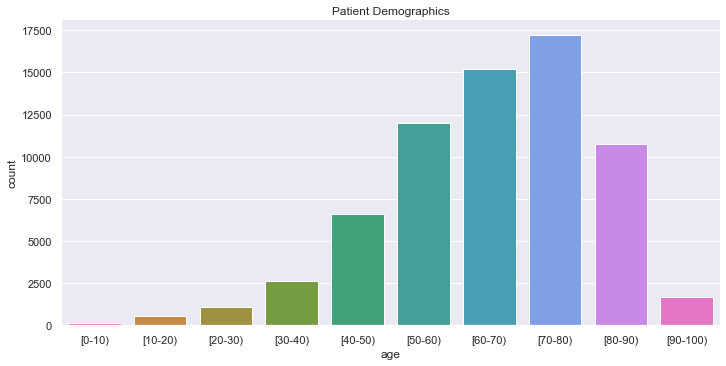

In [15]:
sns.catplot(x='age', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('Patient Demographics')
plt.show()

It looks like most patients are older, 50+ years old, though there aren't many patients over 90.

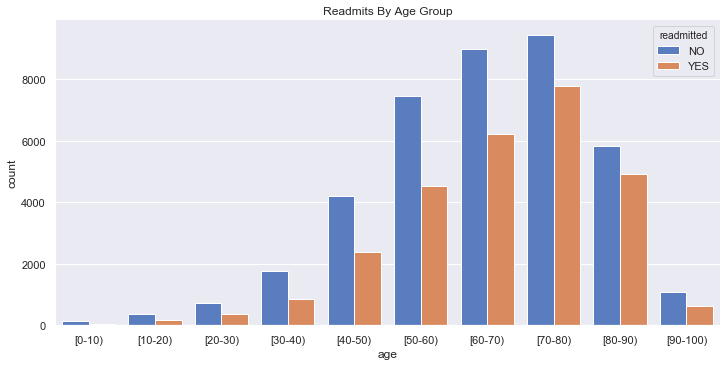

In [16]:
sns.catplot(x='age', hue='readmitted', kind='count', palette='muted', aspect=2, data=diabetes, legend_out=False)
plt.title('Readmits By Age Group')
plt.show()

In every age group, more patients are not readmitted. The 70-80 age group account has the highest number of readmitted and not readmitted patients.

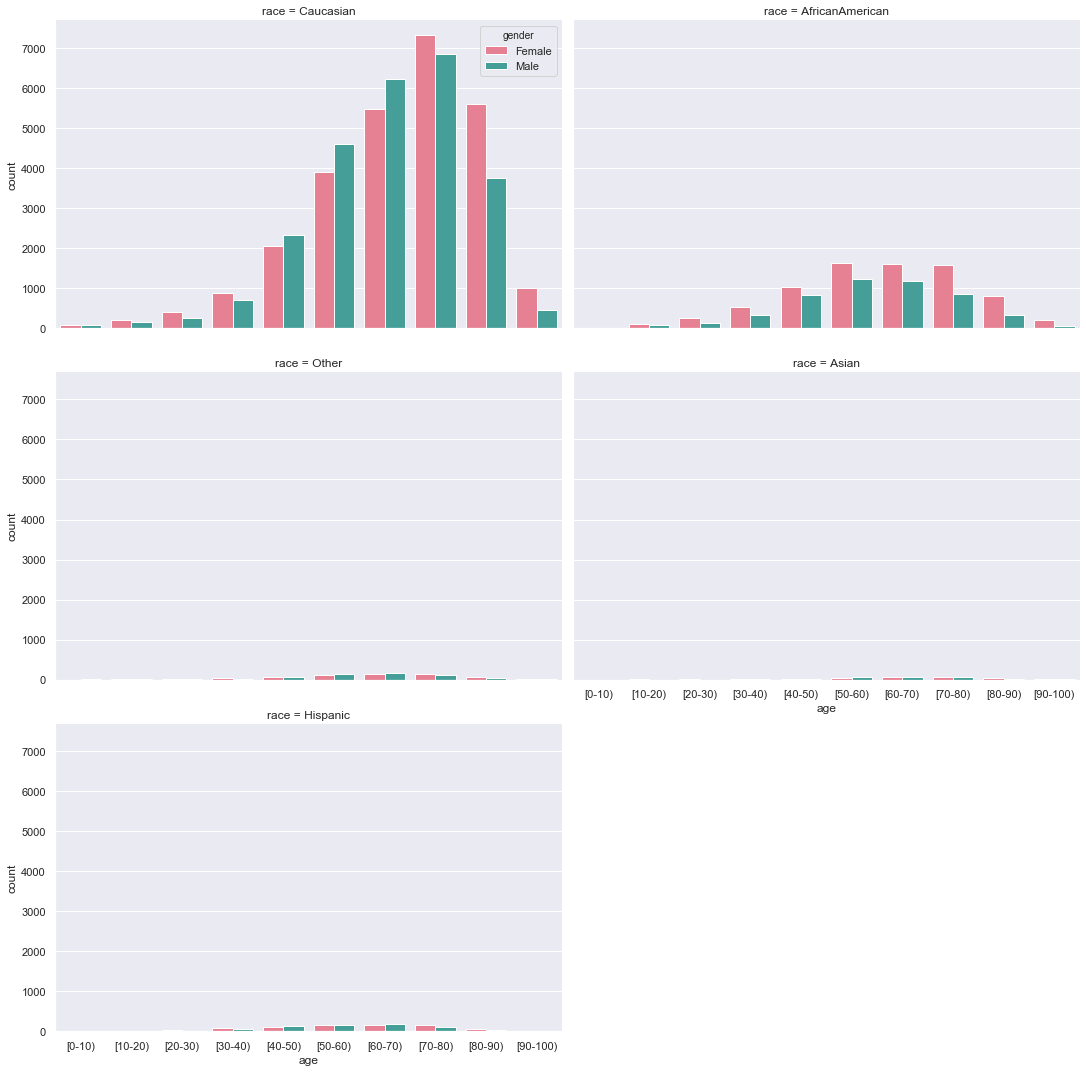

In [17]:
sns.catplot(x='age', hue='gender', col='race', col_wrap=2, palette='husl', data=diabetes, aspect=1.5, kind='count', legend_out=False)
plt.show()

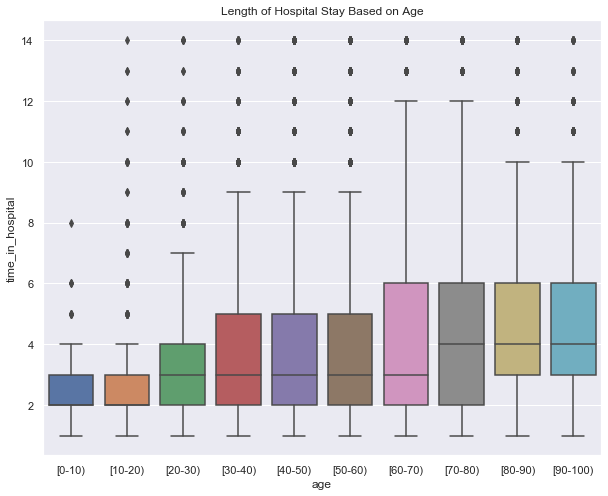

In [18]:
# who is spending the most time in hospitals during visits?
plt.figure(figsize=(10, 8))
sns.boxplot(x='age', y='time_in_hospital', data=diabetes)
plt.title('Length of Hospital Stay Based on Age')
plt.show()

The majority of patients are Caucasian. There are more female patients than males.

# admission type, source, and discharge disposition

We take a look at admission type, admission source, and discharge disposition (what happened after patients left the hospital).

## admission type

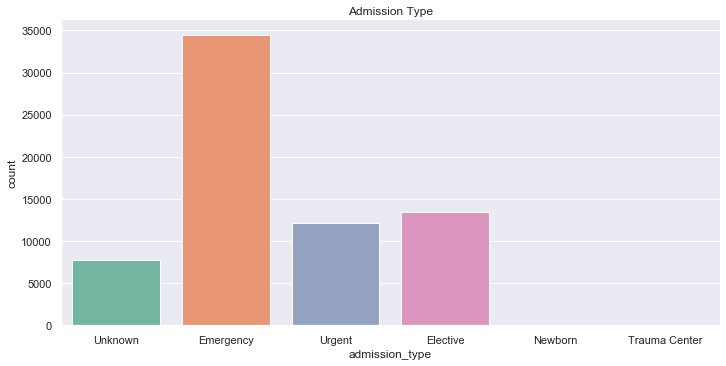

In [19]:
sns.catplot(x='admission_type', kind='count', palette='Set2', data=diabetes, aspect=2)
plt.title('Admission Type')
plt.show()

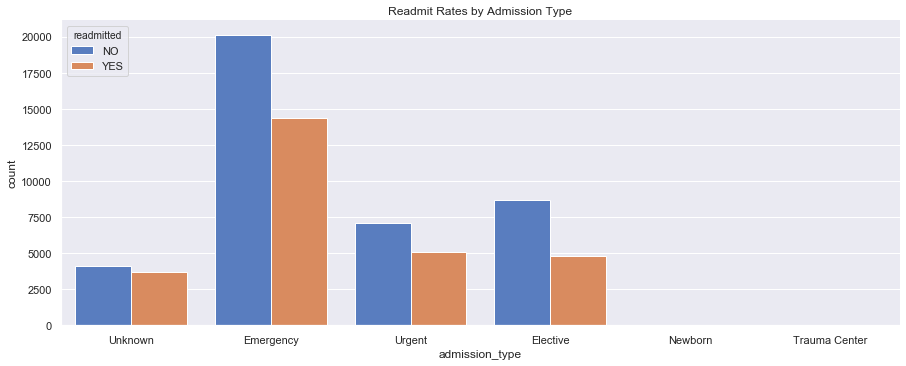

In [20]:
sns.catplot(x='admission_type', hue='readmitted', kind='count', palette='muted', aspect=2.5, data=diabetes, legend_out=False)
plt.title('Readmit Rates by Admission Type')
plt.show()

In [21]:
chart_display(diabetes.readmitted, diabetes.admission_type)

admission_type,Elective,Emergency,Newborn,Trauma Center,Unknown,Urgent,Total
readmitted,,,,,,,
NO,8663,20116,6,17,4109,7089,40000
YES,4781,14357,3,0,3663,5070,27874
Total,13444,34473,9,17,7772,12159,67874


## discharge disposition

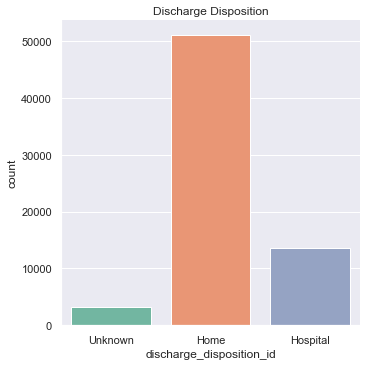

In [22]:
sns.catplot(x='discharge_disposition_id', kind='count', palette='Set2', data=diabetes, aspect=1)
plt.title('Discharge Disposition')
plt.show()

The majority of patients went home after being discharged from the hospital while others transferred to another health care facility / hospital.

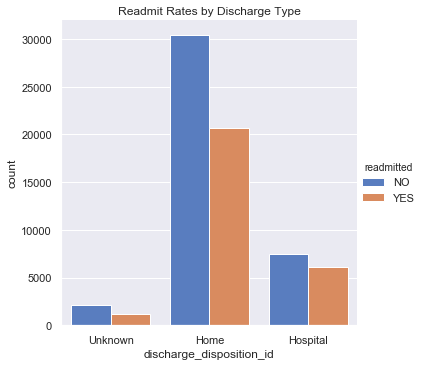

In [23]:
sns.catplot(x='discharge_disposition_id', hue='readmitted', kind='count', palette='muted', data=diabetes)
plt.title('Readmit Rates by Discharge Type')
plt.show()

In [24]:
chart_display(diabetes.readmitted, diabetes.discharge_disposition_id)

discharge_disposition_id,Home,Hospital,Unknown,Total
readmitted,,,,
NO,30438,7470,2092,40000
YES,20643,6106,1125,27874
Total,51081,13576,3217,67874


## admission source

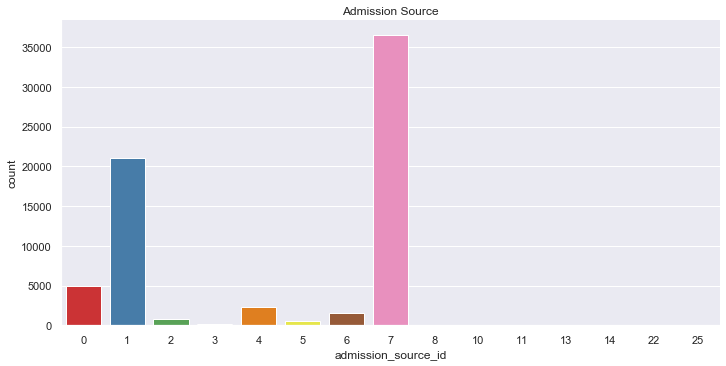

In [25]:
sns.catplot(x='admission_source_id', kind='count', palette='Set1', data=diabetes, aspect=2)
plt.title('Admission Source')
plt.show()

Most patients are admitted via the emergency room, or ID 7, while others came with a physician referral, or ID 1.

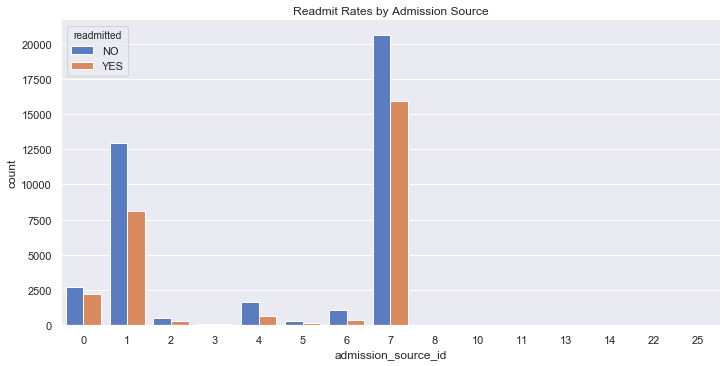

In [26]:
sns.catplot(x='admission_source_id', hue='readmitted', kind='count', palette='muted', aspect=2, data=diabetes, legend_out=False)
plt.title('Readmit Rates by Admission Source')
plt.show()

# hospital visit

We are looking at time_in_hospital, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, and number_inpatient columns.       

## time in hospital

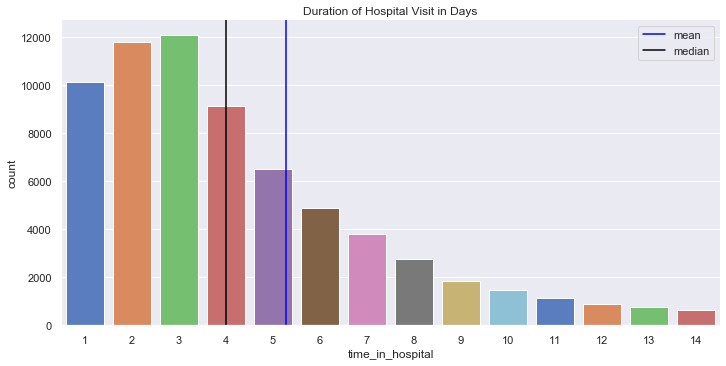

In [27]:
sns.catplot(x='time_in_hospital', kind='count', palette='muted', data=diabetes, aspect=2)
plt.axvline(np.mean(diabetes.time_in_hospital), color='blue', label='mean')
plt.axvline(np.median(diabetes.time_in_hospital), color='black', label='median')
plt.title('Duration of Hospital Visit in Days')
plt.legend()
plt.show()

In [28]:
print('Average time spent in hospital: {} days'.format(round(np.mean(diabetes.time_in_hospital), 2)))
print('Median time spent in hospital: {} days'.format(round(np.median(diabetes.time_in_hospital), 2)))

Average time spent in hospital: 4.28 days
Median time spent in hospital: 3.0 days


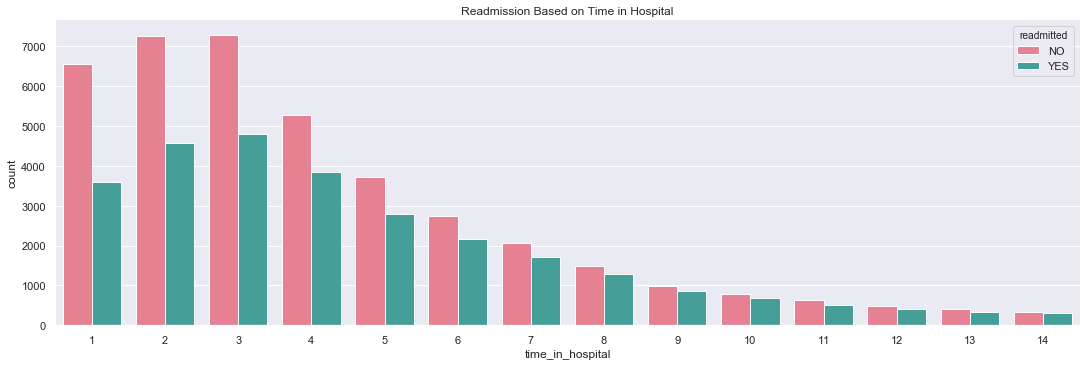

In [29]:
# does the amount of time spent in the hospital impact a patient's chances of readmission?
sns.catplot(x='time_in_hospital', hue='readmitted', kind='count', palette='husl', aspect=3, data=diabetes, legend_out=False)
plt.title('Readmission Based on Time in Hospital')
plt.show()

Based on the graph, the longer a patient spends in the hospital, the likelier their chances are of being readmitted. Patients who spend more than a week in the hospital usually have a serious illness or complication that may reoccur depending on their ability to recover, which is why they may need to revisit the hospital.

## medical specialty

The majority of patients do not have a medical specialty listed for their visit.

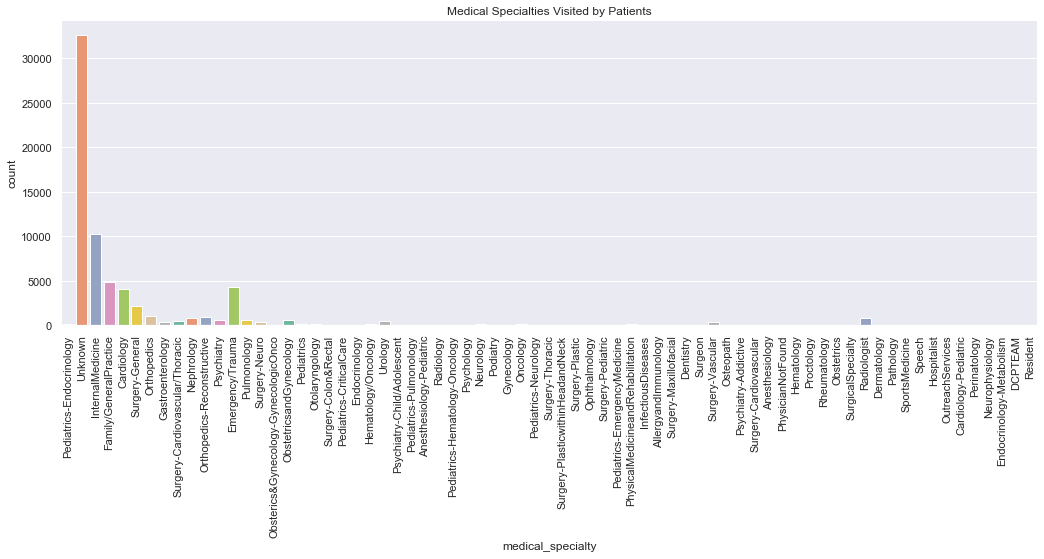

In [30]:
d = sns.catplot(x='medical_specialty', kind='count', palette='Set2', aspect=3, data=diabetes)
d.set_xticklabels(rotation=90)
plt.title('Medical Specialties Visited by Patients')
plt.show()

Since the information on patients' medical specialty is lacking, we are going to remove this column from the dataset.

In [31]:
diabetes = diabetes.drop(columns=['medical_specialty'])

## number of lab procedures

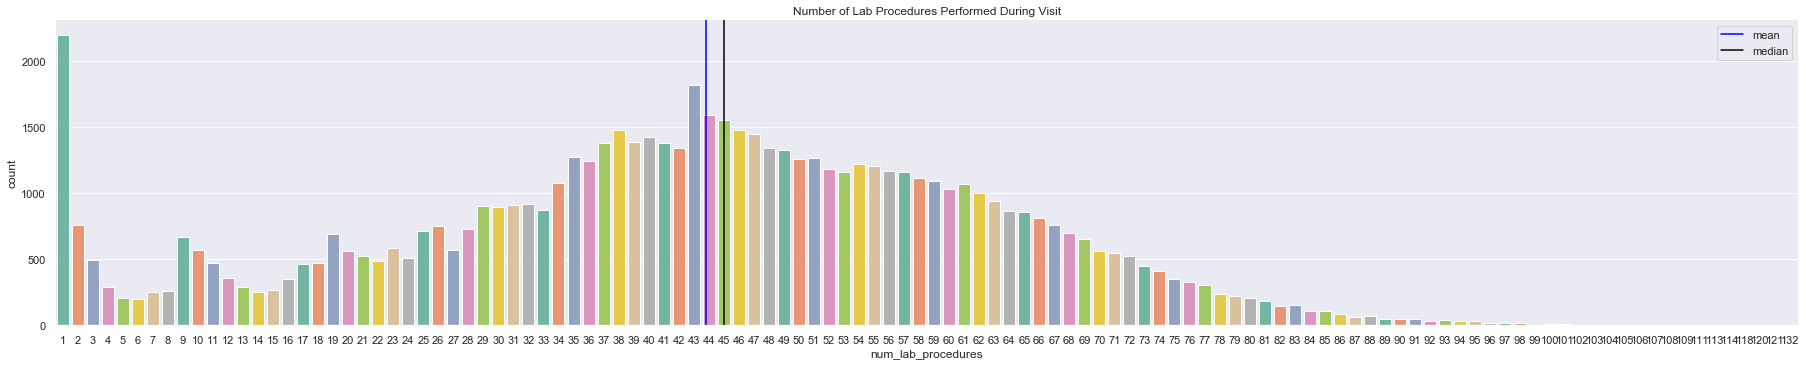

In [32]:
sns.catplot(x='num_lab_procedures', kind='count', palette='Set2', data=diabetes, aspect=5)
plt.axvline(np.mean(diabetes.num_lab_procedures), color='blue', label='mean')
plt.axvline(np.median(diabetes.num_lab_procedures), color='black', label='median')
plt.title('Number of Lab Procedures Performed During Visit')
plt.legend()
plt.show()

In [33]:
print('Lab Procedures Performed During Visit')
print('Average: {} lab procedures'.format(round(np.mean(diabetes.num_lab_procedures), 2)))
print('Median: {} lab procedures'.format(round(np.median(diabetes.num_lab_procedures), 2)))

Lab Procedures Performed During Visit
Average: 42.85 lab procedures
Median: 44.0 lab procedures


In [34]:
diabetes.groupby('readmitted')['num_lab_procedures'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,40000.0,41.936625,19.901581,1.0,30.0,43.0,56.0,121.0
YES,27874.0,44.158248,19.907322,1.0,32.0,45.0,58.0,132.0


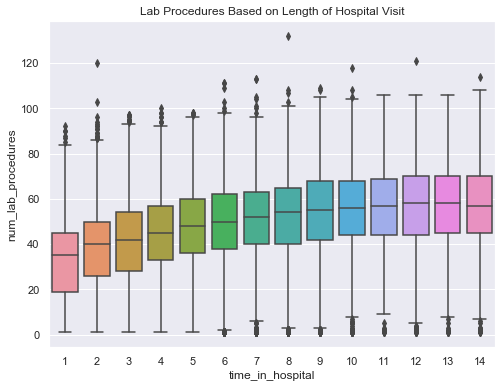

In [35]:
# do patients with longer hospital stays have more lab procedures?
plt.figure(figsize=(8, 6))
sns.boxplot(x='time_in_hospital', y='num_lab_procedures', data=diabetes)
plt.title('Lab Procedures Based on Length of Hospital Visit')
plt.show()

Based on the graph, some patients had over 100 lab procedures completed during their hospital visit, which is understandable given how long they stayed in the hospital. However, a few outliers exist for patients who had over 110 lab procedures done given how long they stayed. To make sure our data represents the majority of patients, we are removing these outliers.

In [36]:
# remove rows that have over 110 lab procedures
diabetes = diabetes[diabetes.num_lab_procedures < 111]

## number of procedures (other than lab)

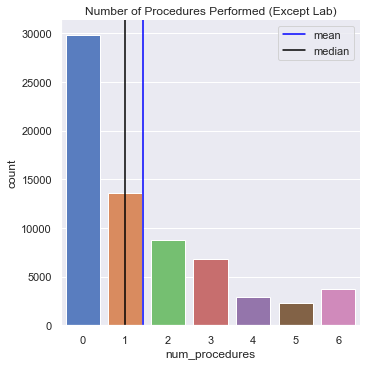

In [37]:
sns.catplot(x='num_procedures', kind='count', palette='muted', data=diabetes)
plt.axvline(np.mean(diabetes.num_procedures), color='blue', label='mean')
plt.axvline(np.median(diabetes.num_procedures), color='black', label='median')
plt.title('Number of Procedures Performed (Except Lab)')
plt.legend()
plt.show()

In [38]:
print('Procedures Performed During Visit Besides Lab:')
print('Average: {} procedures'.format(round(np.mean(diabetes.num_procedures), 2)))
print('Median: {} procedures'.format(round(np.median(diabetes.num_procedures), 2)))

Procedures Performed During Visit Besides Lab:
Average: 1.43 procedures
Median: 1.0 procedures


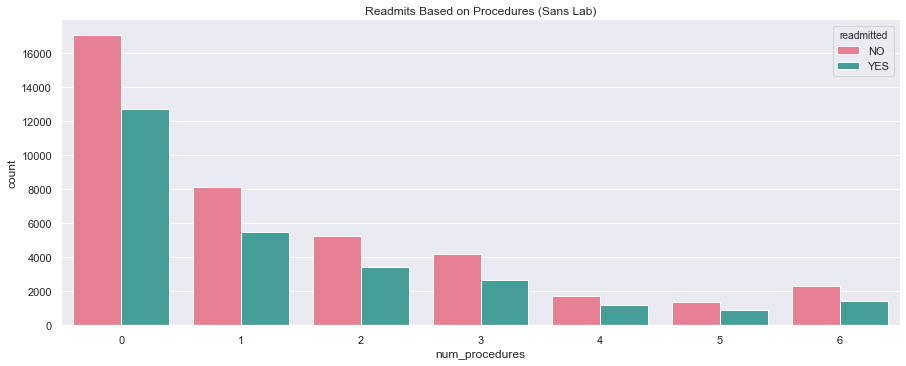

In [39]:
# do the number of tests performed indicate whether a patient will be readmitted?
sns.catplot(x='num_procedures', hue='readmitted', kind='count', palette='husl', aspect=2.5, data=diabetes, legend_out=False)
plt.title('Readmits Based on Procedures (Sans Lab)')
plt.show()

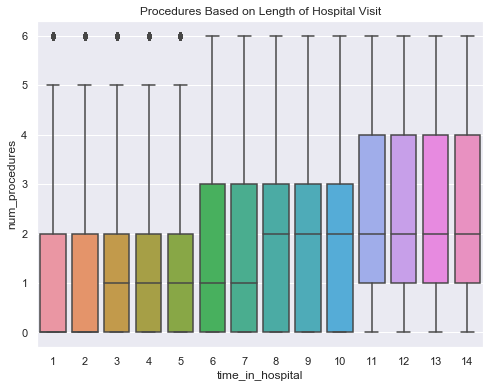

In [40]:
# do patients with longer hospital stays have more procedures?
plt.figure(figsize=(8, 6))
sns.boxplot(x='time_in_hospital', y='num_procedures', data=diabetes)
plt.title('Procedures Based on Length of Hospital Visit')
plt.show()

Patients who spend more time in the hospital have more procedures completed, though most patients have less than 3.

## number of medications

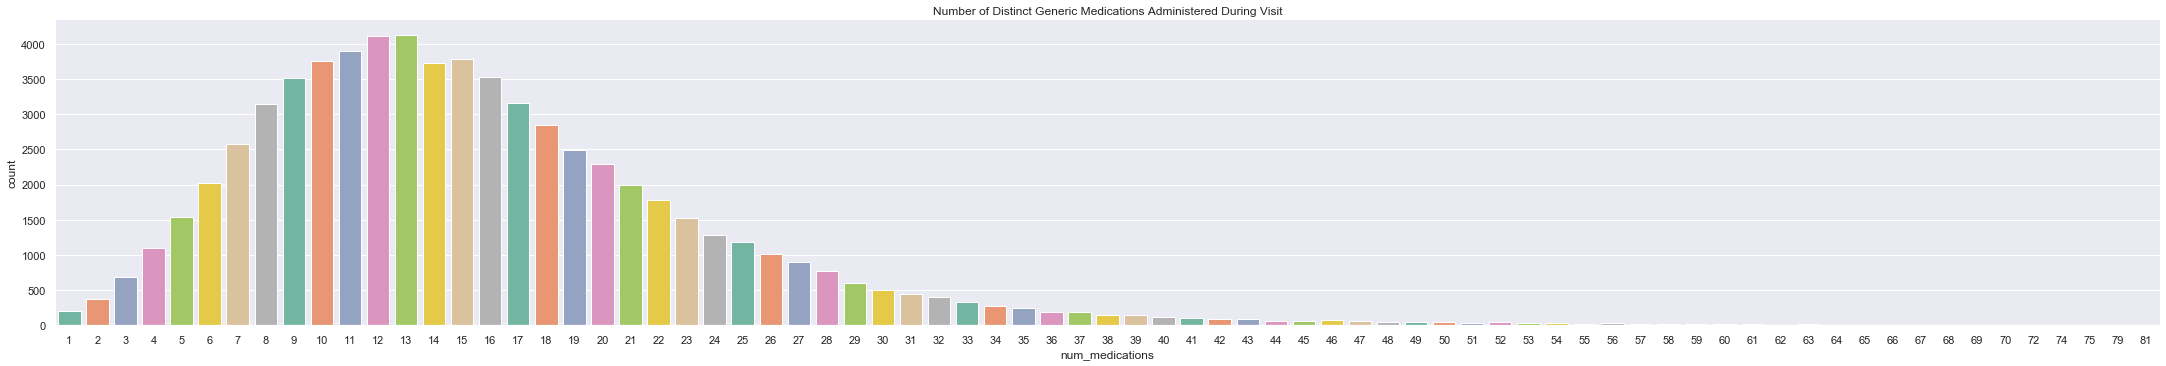

In [41]:
sns.catplot(x='num_medications', kind='count', palette='Set2', data=diabetes, aspect=6)
plt.title('Number of Distinct Generic Medications Administered During Visit')
plt.show()

In [42]:
print('Distinct Generic Medications Administered During Visit:')
print('Average: {} medications'.format(round(np.mean(diabetes.num_medications), 2)))
print('Median: {} medications'.format(round(np.median(diabetes.num_medications), 2)))

Distinct Generic Medications Administered During Visit:
Average: 15.67 medications
Median: 14.0 medications


In [43]:
diabetes.groupby('readmitted')['num_medications'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39992.0,15.402180,8.523962,1.0,10.0,14.0,19.0,79.0
YES,27873.0,16.052129,7.898019,1.0,11.0,15.0,20.0,81.0


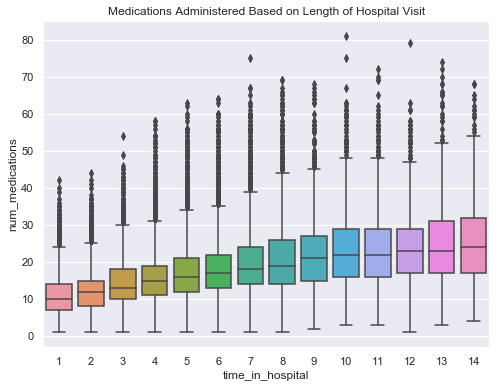

In [44]:
# how many medications are patients receiving during their visit?
plt.figure(figsize=(8, 6))
sns.boxplot(x='time_in_hospital', y='num_medications', data=diabetes)
plt.title('Medications Administered Based on Length of Hospital Visit')
plt.show()

Patients who spend more time in the hospital receive more medications, but there are a few that receive over 60 different kinds of medications. We are removing any patients that received over 60 medications. The 75% percentile of patients received 20 distinct medications.

In [45]:
# remove rows with more than 60 medications
diabetes = diabetes[diabetes.num_medications < 61]

In [46]:
# updated stats
diabetes.groupby('readmitted')['num_medications'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39946.0,15.345416,8.361919,1.0,10.0,14.0,19.0,60.0
YES,27844.0,15.999928,7.733317,1.0,11.0,15.0,20.0,60.0


## number of outpatient visits

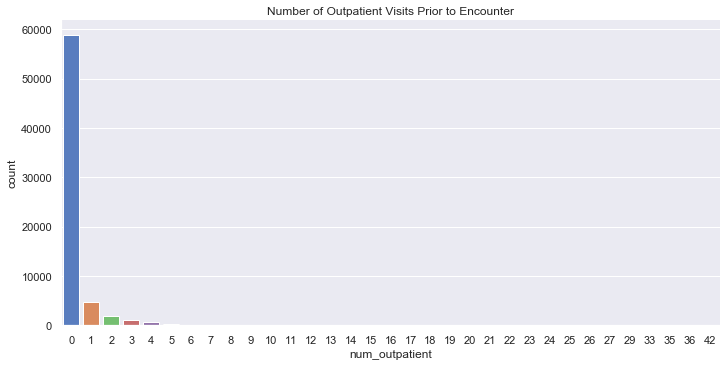

In [47]:
sns.catplot(x='num_outpatient', kind='count', palette='muted', data=diabetes, aspect=2)
plt.title('Number of Outpatient Visits Prior to Encounter')
plt.show()

In [48]:
# outpatient visit stats
diabetes.groupby('readmitted')['num_outpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39946.0,0.226331,0.919963,0.0,0.0,0.0,0.0,36.0
YES,27844.0,0.365932,1.260270,0.0,0.0,0.0,0.0,42.0


The number of outpatient visits for most patients is 0 so we are removing any patients who have more than 20 outpatient visits prior to their recorded hospital encounter.

In [49]:
# remove rows with more than 20 outpatient visits
diabetes = diabetes[diabetes.num_outpatient < 21]

In [50]:
# outpatient visit stats - updated
diabetes.groupby('readmitted')['num_outpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39942.0,0.223324,0.867934,0.0,0.0,0.0,0.0,20.0
YES,27832.0,0.354304,1.122660,0.0,0.0,0.0,0.0,20.0


## number of emergency visits

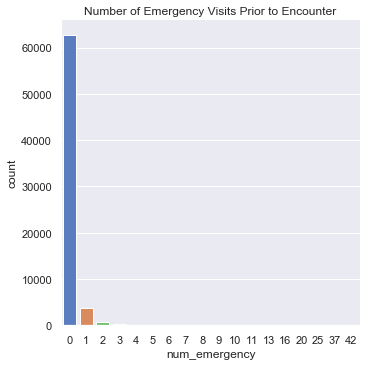

In [51]:
sns.catplot(x='num_emergency', kind='count', palette='muted', data=diabetes)
plt.title('Number of Emergency Visits Prior to Encounter')
plt.show()

In [52]:
diabetes.groupby('readmitted')['num_emergency'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39942.0,0.073206,0.426282,0.0,0.0,0.0,0.0,37.0
YES,27832.0,0.153421,0.624293,0.0,0.0,0.0,0.0,42.0


The emergency visit numbers are heavily skewed, showing that the majority of patients did not have any visits to the emergency room in the year prior to their current appointment. We are removing any patients who visited the emergency room more than 10 times prior to their recorded hospital visit.

In [53]:
# remove rows with more than 10 emergency room vists
diabetes = diabetes[diabetes.num_emergency < 11]

## number of inpatient visits

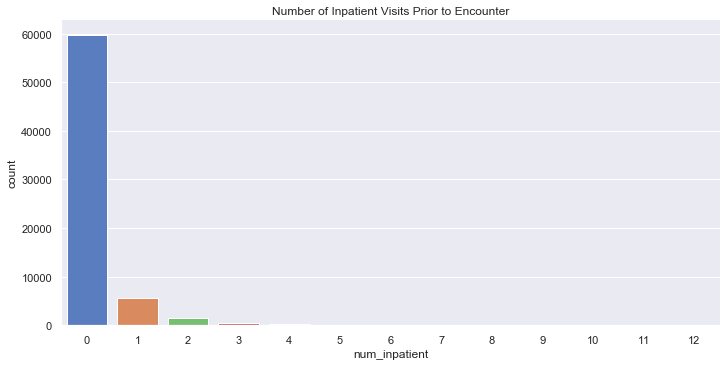

In [54]:
sns.catplot(x='num_inpatient', kind='count', palette='muted', data=diabetes, aspect=2)
plt.title('Number of Inpatient Visits Prior to Encounter')
plt.show()

In [55]:
diabetes.groupby('readmitted')['num_inpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39938.0,0.104812,0.417560,0.0,0.0,0.0,0.0,10.0
YES,27828.0,0.283312,0.788851,0.0,0.0,0.0,0.0,12.0


Inpatient visits are not common for most patients prior to this visit, so we are removing any patients who have visited the hospital more than 8 times prior to this visit.

In [56]:
# remove rows with more than 8 inpatient visits
diabetes = diabetes[diabetes.num_inpatient < 9]

# patient diagnoses

## number of diagnoses

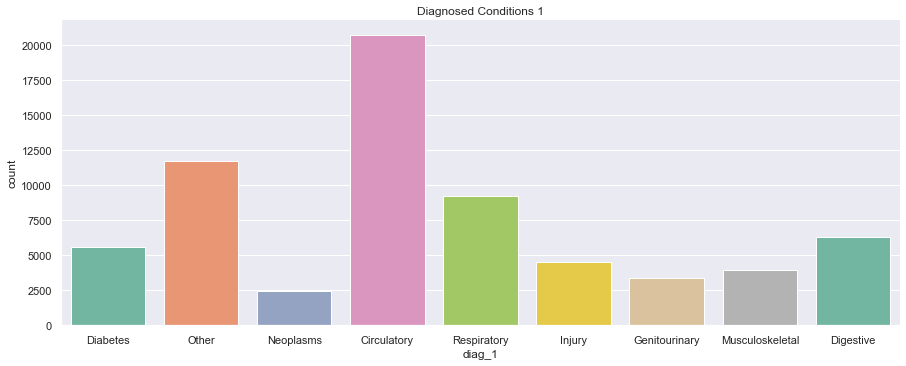

In [57]:
sns.catplot(x='diag_1', kind='count', palette='Set2', data=diabetes, aspect=2.5)
plt.title('Diagnosed Conditions 1')
plt.show()

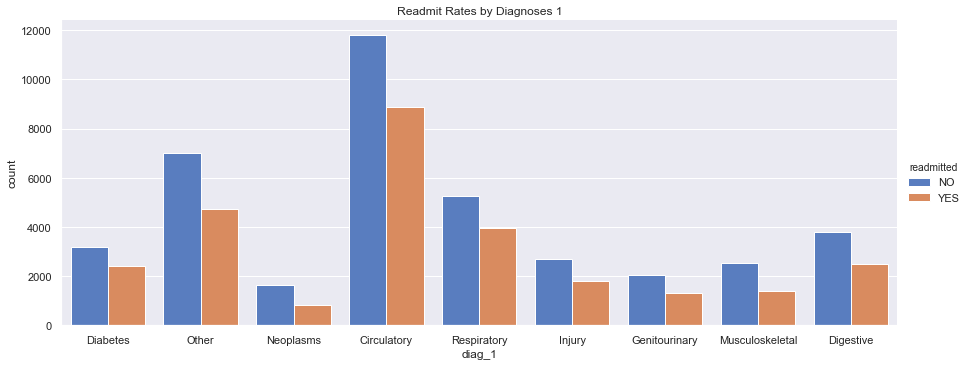

In [58]:
sns.catplot(x='diag_1', hue='readmitted', kind='count', palette='muted', aspect=2.5, data=diabetes)
plt.title('Readmit Rates by Diagnoses 1')
plt.show()

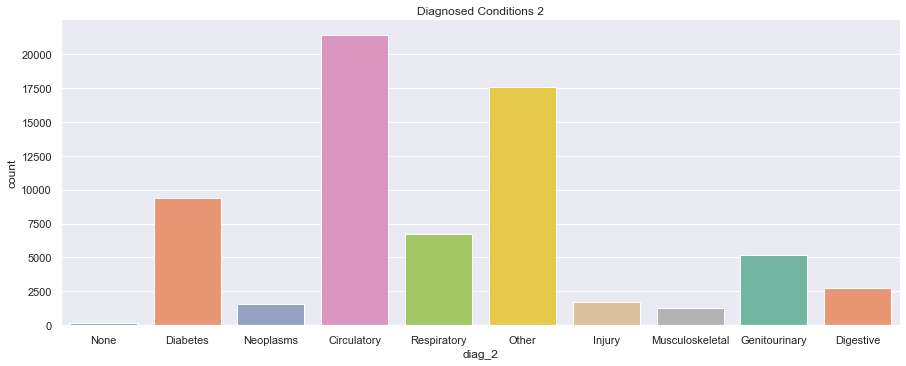

In [59]:
sns.catplot(x='diag_2', kind='count', palette='Set2', data=diabetes, aspect=2.5)
plt.title('Diagnosed Conditions 2')
plt.show()

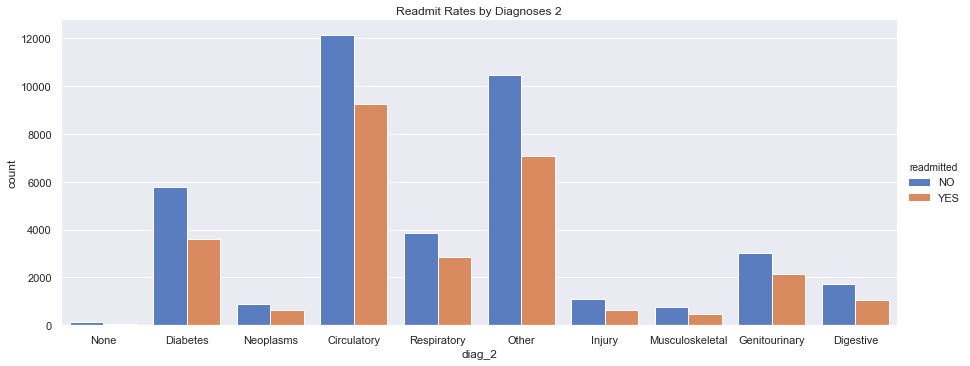

In [60]:
sns.catplot(x='diag_2', hue='readmitted', kind='count', palette='muted', aspect=2.5, data=diabetes)
plt.title('Readmit Rates by Diagnoses 2')
plt.show()

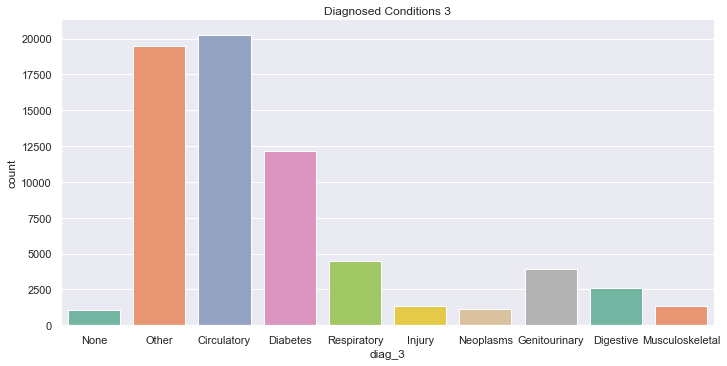

In [61]:
sns.catplot(x='diag_3', kind='count', palette='Set2', data=diabetes, aspect=2)
plt.title('Diagnosed Conditions 3')
plt.show()

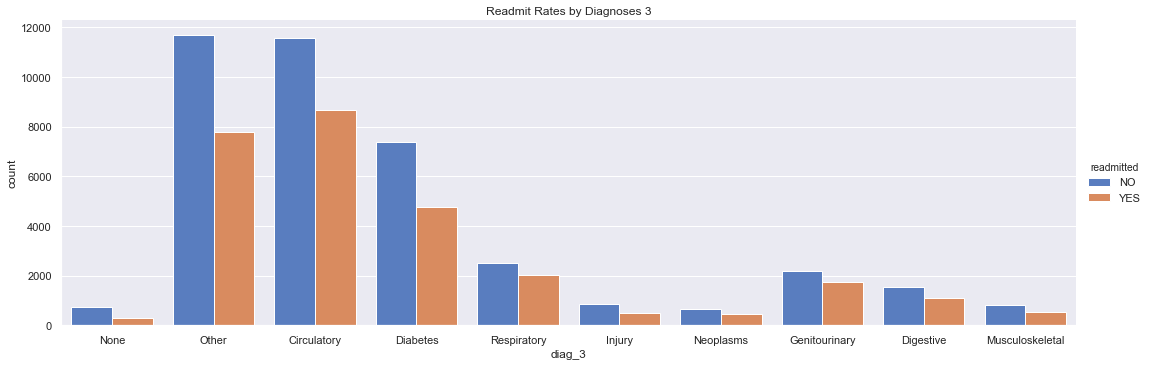

In [62]:
sns.catplot(x='diag_3', hue='readmitted', kind='count', palette='muted', aspect=3, data=diabetes)
plt.title('Readmit Rates by Diagnoses 3')
plt.show()

# number of diagnoses, glucose levels, and HbA1C test

Here, we are covering number_diagnoses, max_glu_serum, and HbA1C result.

## number of diagnosed conditions

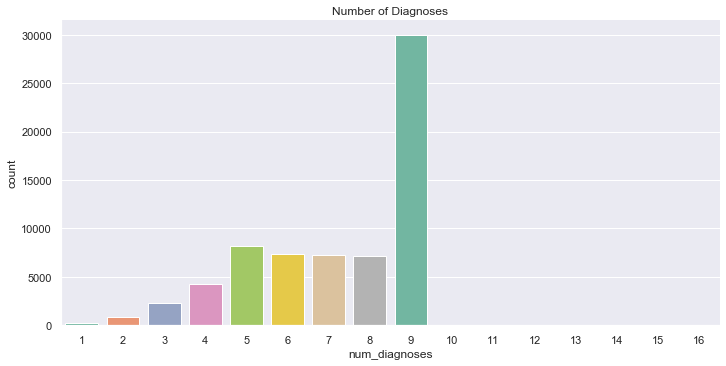

In [63]:
sns.catplot(x='num_diagnoses', kind='count', palette='Set2', data=diabetes, aspect=2)
plt.title('Number of Diagnoses')
plt.show()

In [64]:
print('Number of Diagnoses:')
print('Average: {} diagnoses'.format(round(np.mean(diabetes.num_diagnoses), 2)))
print('Median: {} diagnoses'.format(round(np.median(diabetes.num_diagnoses), 2)))

Number of Diagnoses:
Average: 7.24 diagnoses
Median: 8.0 diagnoses


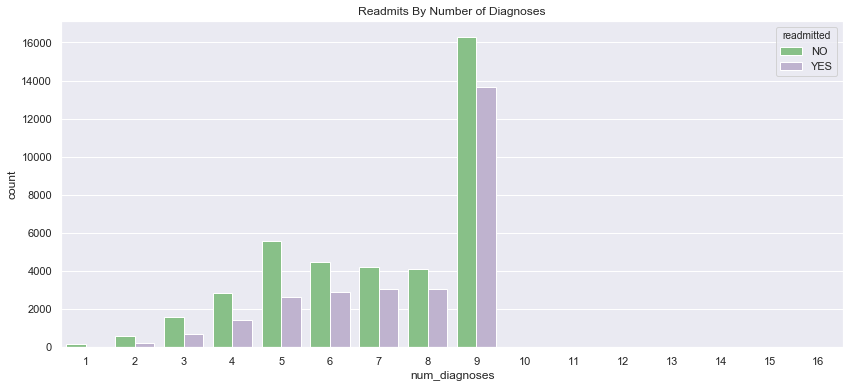

In [65]:
# number of diagnoses and readmit rate
plt.figure(figsize=(14, 6))
sns.countplot(x='num_diagnoses', hue='readmitted', palette='Accent', data=diabetes)
plt.title('Readmits By Number of Diagnoses')
plt.show()

In [66]:
diabetes.num_diagnoses.describe()

count    67750.000000
mean         7.243336
std          1.994488
min          1.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         16.000000
Name: num_diagnoses, dtype: float64

In [67]:
diabetes.groupby('readmitted')['num_diagnoses'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39936.0,7.062951,2.061601,1.0,5.0,8.0,9.0,16.0
YES,27814.0,7.502337,1.863722,1.0,6.0,8.0,9.0,16.0


In [68]:
# number of diagnoses
chart_display(diabetes.readmitted, diabetes.num_diagnoses)

num_diagnoses,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Total
readmitted,,,,,,,,,,,,,,,,,
NO,154,598,1591,2873,5555,4480,4216,4127,16303,6,2,3,6,2,3,17,39936
YES,34,244,686,1408,2659,2927,3077,3074,13678,2,4,3,4,3,2,9,27814
Total,188,842,2277,4281,8214,7407,7293,7201,29981,8,6,6,10,5,5,26,67750


Most patients have up to nine diagnosed conditions during their visit, after that, only a handful have more than nine in one visit. It's safe for us to remove any patients who have more than 10 diagnoses per visit.

In [69]:
# remove rows with more than 9 diagnosed conditions
diabetes = diabetes[diabetes.num_diagnoses < 10]

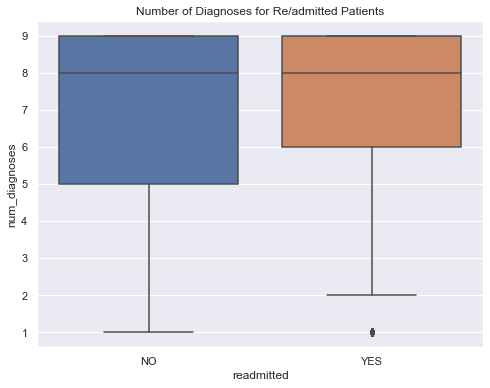

In [70]:
# how many diagnoses do readmitted patients have?
plt.figure(figsize=(8, 6))
sns.boxplot(x='readmitted', y='num_diagnoses', data=diabetes)
plt.title('Number of Diagnoses for Re/admitted Patients')
plt.show()

## glucose serum test results

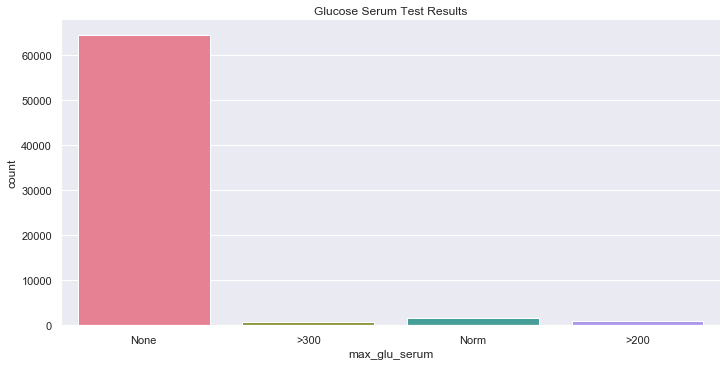

In [71]:
sns.catplot(x='max_glu_serum', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('Glucose Serum Test Results')
plt.show()

Since the majority of patients do not have a glucose reading, they will be excluded for the next graph in order to show the readmit rates for patients who do have a reading.

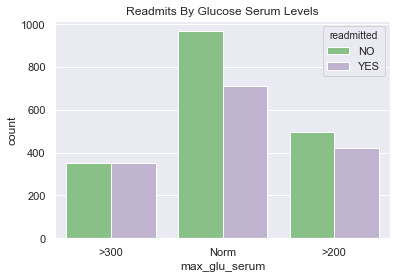

In [72]:
# exclude patients without a glucose reading
glucose_none = diabetes[diabetes.max_glu_serum != 'None']

# glucose serum results and readmit impact
sns.countplot(x='max_glu_serum', hue='readmitted', palette='Accent', data=glucose_none)
plt.title('Readmits By Glucose Serum Levels')
plt.show()

Patients with a glucose serum reading of over 300 have a 50-50 chance of being readmitted. High blood sugar levels are often dangerous for older patients due to the medical complications involved, so it's understandable that more patients return to the hospital for additional care.

In [73]:
chart_display(diabetes.readmitted, diabetes.max_glu_serum)

max_glu_serum,>200,>300,None,Norm,Total
readmitted,,,,,
NO,497,352,38081,967,39897
YES,421,351,26306,709,27787
Total,918,703,64387,1676,67684


## HbA1C results

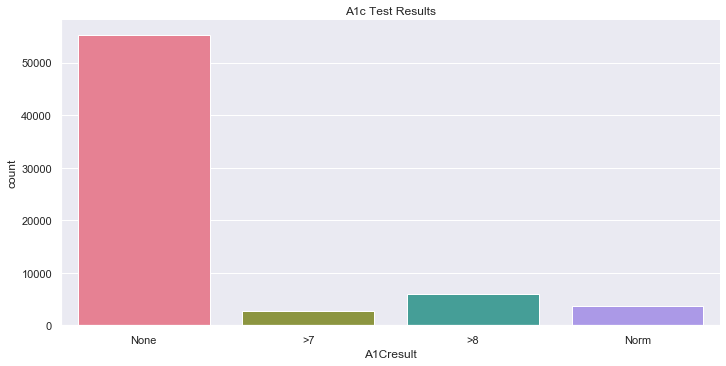

In [74]:
sns.catplot(x='A1Cresult', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('A1c Test Results')
plt.show()

Similar to the glucose reading, the majority of patients also do not have an A1c test reading. In order to understand the impact of A1c tests on readmit rates, patients without a reading will be excluded.

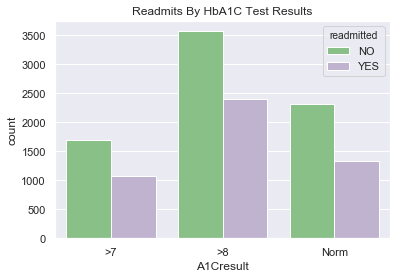

In [75]:
# exclude patients without an A1C reading
alc_none = diabetes[diabetes.A1Cresult != 'None']

# A1C results and readmit impact
sns.countplot(x='A1Cresult', hue='readmitted', palette='Accent', data=alc_none)
plt.title('Readmits By HbA1C Test Results')
plt.show()

In [76]:
chart_display(diabetes.readmitted, diabetes.A1Cresult)

A1Cresult,>7,>8,None,Norm,Total
readmitted,,,,,
NO,1693,3572,32322,2310,39897
YES,1079,2409,22965,1334,27787
Total,2772,5981,55287,3644,67684


## box plots

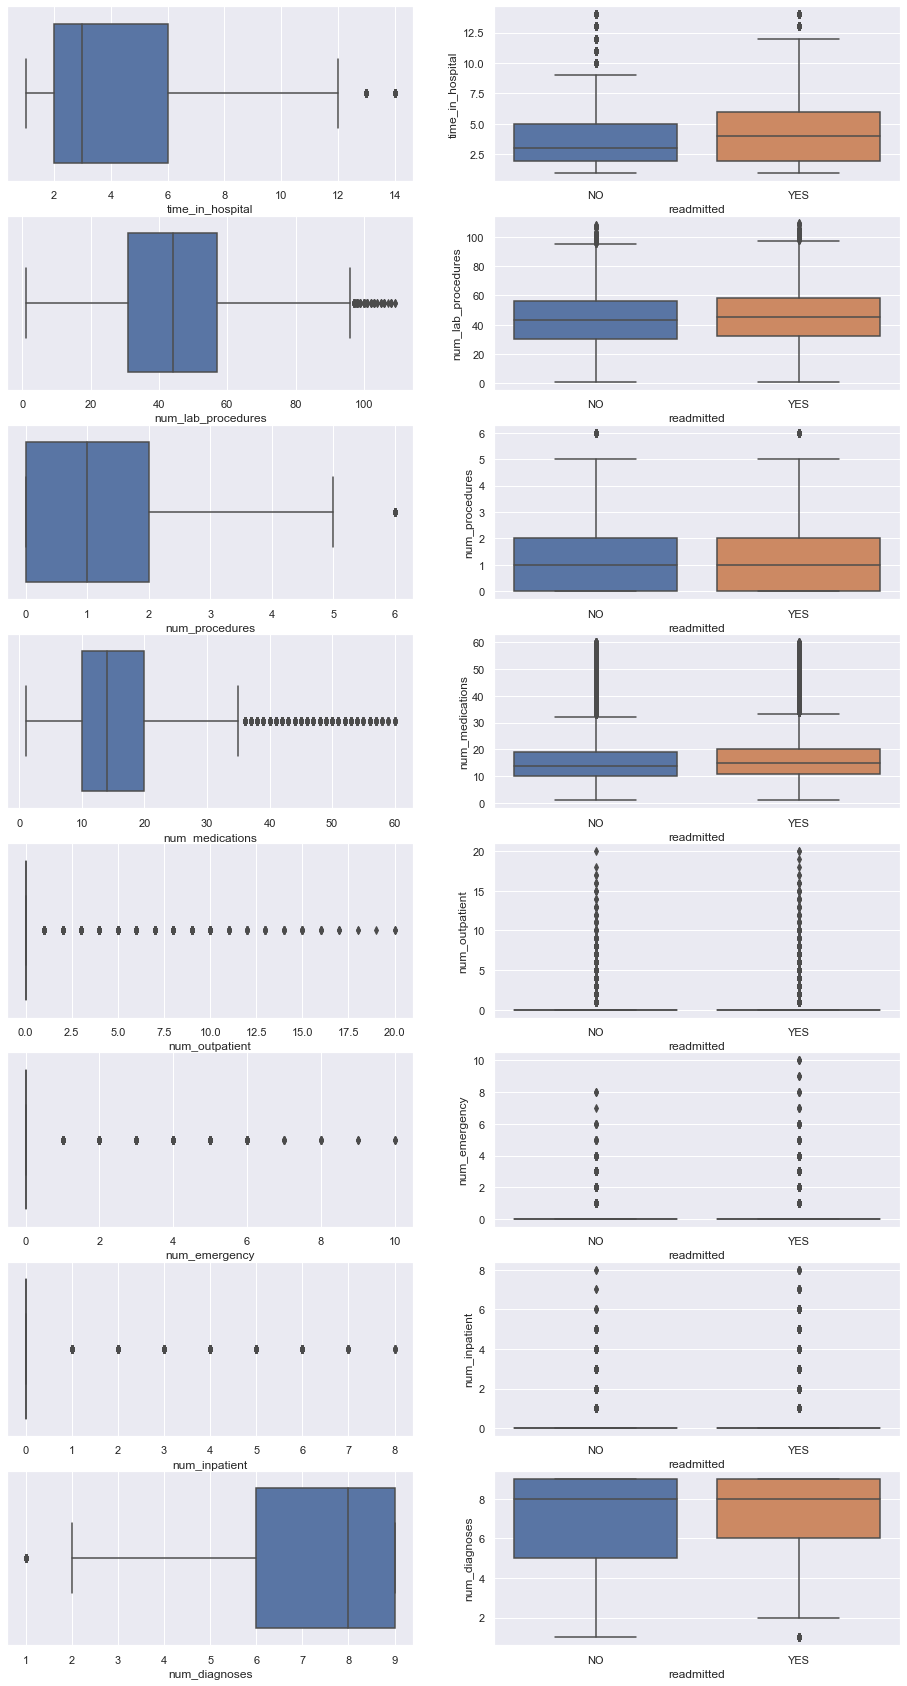

In [77]:
plt.figure(figsize=(16, 34))
plt.subplot(9,2,1)
sns.boxplot(x='time_in_hospital', data=diabetes)
plt.subplot(9,2,2)
sns.boxplot(x='readmitted', y='time_in_hospital', data=diabetes)
plt.subplot(9,2,3)
sns.boxplot(x='num_lab_procedures', data=diabetes)
plt.subplot(9,2,4)
sns.boxplot(x='readmitted', y='num_lab_procedures', data=diabetes)
plt.subplot(9,2,5)
sns.boxplot(x='num_procedures', data=diabetes)
plt.subplot(9,2,6)
sns.boxplot(x='readmitted', y='num_procedures', data=diabetes)
plt.subplot(9,2,7)
sns.boxplot(x='num_medications', data=diabetes)
plt.subplot(9,2,8)
sns.boxplot(x='readmitted', y='num_medications', data=diabetes)
plt.subplot(9,2,9)
sns.boxplot(x='num_outpatient', data=diabetes)
plt.subplot(9,2,10)
sns.boxplot(x='readmitted', y='num_outpatient', data=diabetes)
plt.subplot(9,2,11)
sns.boxplot(x='num_emergency', data=diabetes)
plt.subplot(9,2,12)
sns.boxplot(x='readmitted', y='num_emergency', data=diabetes)
plt.subplot(9,2,13)
sns.boxplot(x='num_inpatient', data=diabetes)
plt.subplot(9,2,14)
sns.boxplot(x='readmitted', y='num_inpatient', data=diabetes)
plt.subplot(9,2,15)
sns.boxplot(x='num_diagnoses', data=diabetes)
plt.subplot(9,2,16)
sns.boxplot(x='readmitted', y='num_diagnoses', data=diabetes)

plt.show()

# medications

Let's take a look at changes in medications and diabetes medications.

## change in medications, dosage or brand

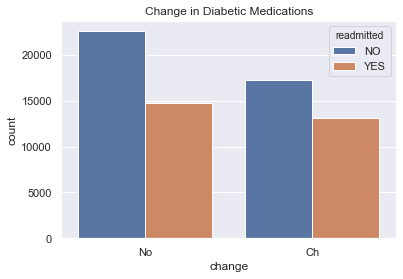

In [78]:
# change in medications
sns.countplot(x='change', hue='readmitted', data=diabetes)
plt.title('Change in Diabetic Medications')
plt.show()

In [79]:
chart_display(diabetes.change, diabetes.readmitted)

readmitted,NO,YES,Total
change,,,
Ch,17299,13075,30374
No,22598,14712,37310
Total,39897,27787,67684


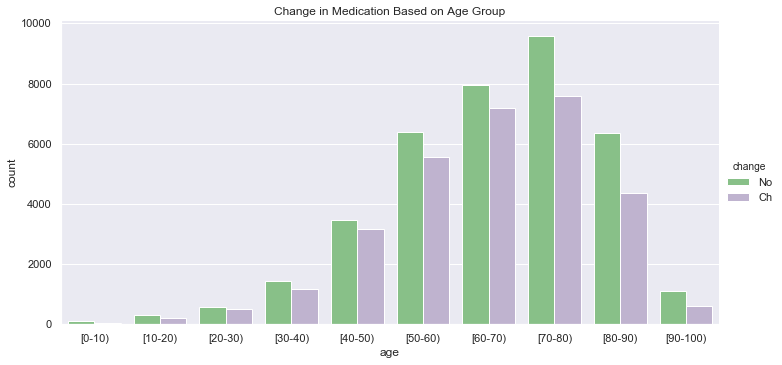

In [80]:
# who is likely or not likely to have a change in medication?
sns.catplot(x='age', hue='change', kind='count', palette='Accent', aspect=2, data=diabetes)
plt.title('Change in Medication Based on Age Group')
plt.show()

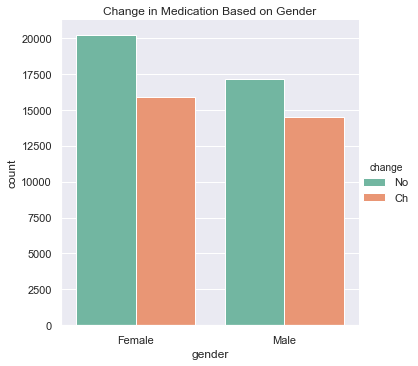

In [81]:
# who is likely to have a change in medication?
sns.catplot(x='gender', hue='change', kind='count', palette='Set2', data=diabetes)
plt.title('Change in Medication Based on Gender')
plt.show()

In [82]:
chart_display(diabetes.gender, diabetes.change)

change,Ch,No,Total
gender,,,
Female,15879,20204,36083
Male,14495,17106,31601
Total,30374,37310,67684


## diabetic medications prescribed

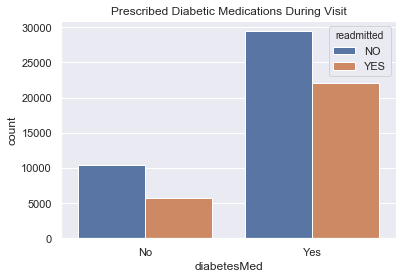

In [83]:
sns.countplot(x='diabetesMed', hue='readmitted', data=diabetes)
plt.title('Prescribed Diabetic Medications During Visit')
plt.show()

In [84]:
chart_display(diabetes.diabetesMed, diabetes.readmitted)

readmitted,NO,YES,Total
diabetesMed,,,
No,10466,5784,16250
Yes,29431,22003,51434
Total,39897,27787,67684


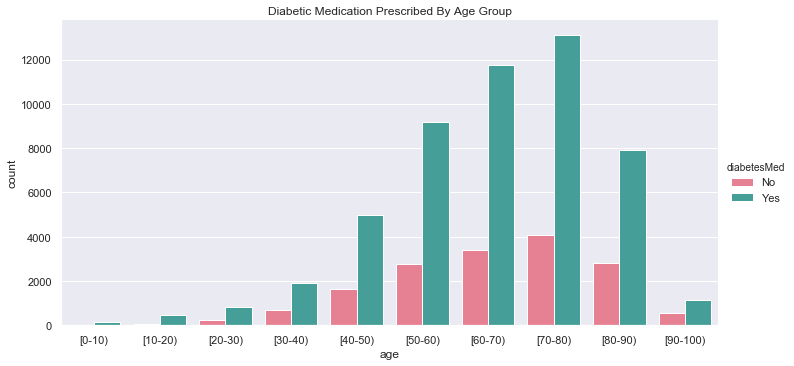

In [85]:
# which age group is likely to have a change in diabetes medication?
sns.catplot(x='age', hue='diabetesMed', kind='count', palette='husl', aspect=2, data=diabetes)
plt.title('Diabetic Medication Prescribed By Age Group')
plt.show()

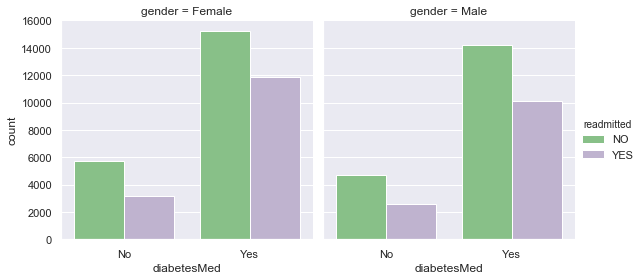

In [86]:
# who is likely or not likely to have a change in medication?
sns.catplot(x='diabetesMed', hue='readmitted', col='gender', palette='Accent', data=diabetes, kind='count', height=4, aspect=1)
plt.show()

## medications used by patients

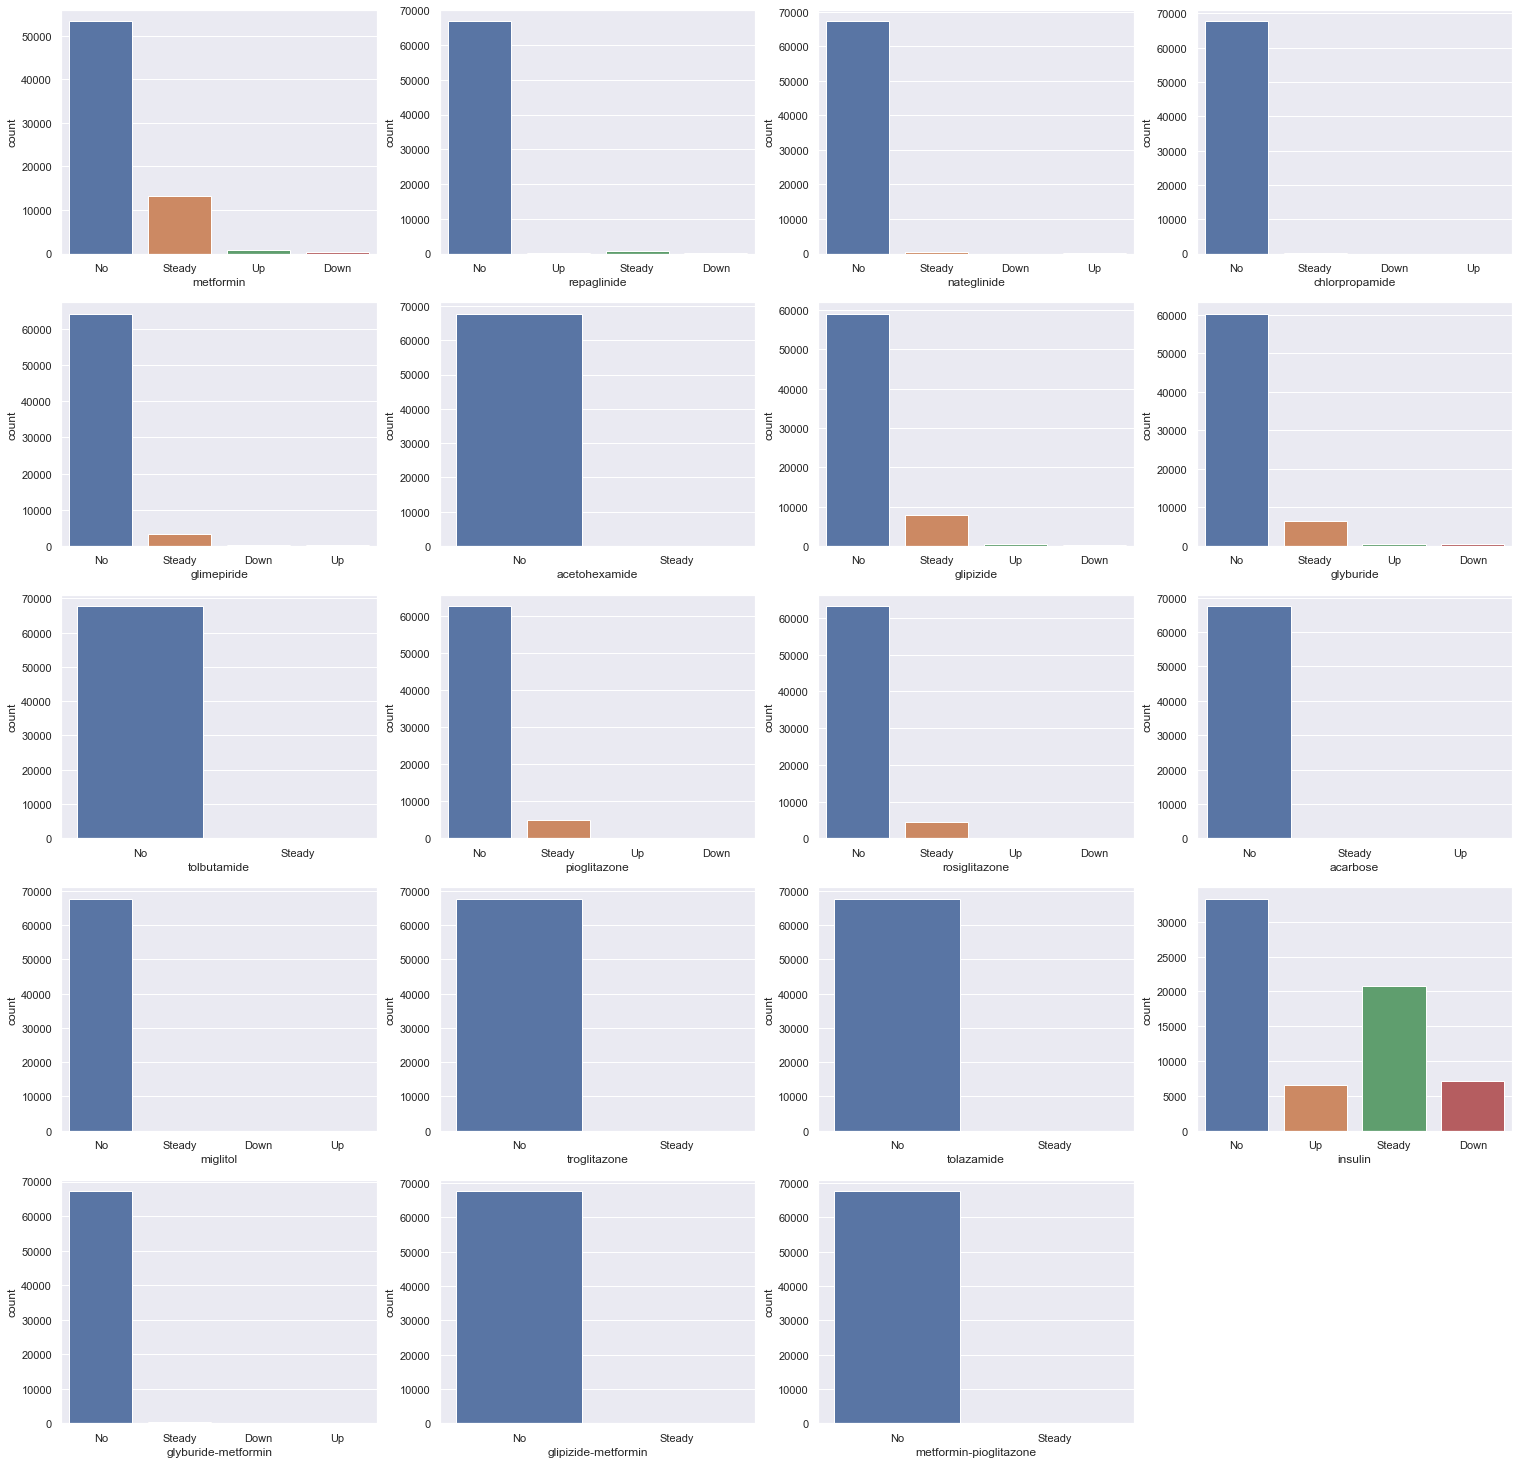

In [87]:
plt.figure(figsize=(26, 26))
plt.subplot(541)
sns.countplot(x='metformin', data=diabetes)
plt.subplot(542)
sns.countplot(x='repaglinide', data=diabetes)
plt.subplot(543)
sns.countplot(x='nateglinide', data=diabetes)
plt.subplot(544)
sns.countplot(x='chlorpropamide', data=diabetes)
plt.subplot(545)
sns.countplot(x='glimepiride', data=diabetes)
plt.subplot(546)
sns.countplot(x='acetohexamide', data=diabetes)
plt.subplot(547)
sns.countplot(x='glipizide', data=diabetes)
plt.subplot(548)
sns.countplot(x='glyburide', data=diabetes)
plt.subplot(549)
sns.countplot(x='tolbutamide', data=diabetes)
plt.subplot(5,4,10)
sns.countplot(x='pioglitazone', data=diabetes)
plt.subplot(5,4,11)
sns.countplot(x='rosiglitazone', data=diabetes)
plt.subplot(5,4,12)
sns.countplot(x='acarbose', data=diabetes)
plt.subplot(5,4,13)
sns.countplot(x='miglitol', data=diabetes)
plt.subplot(5,4,14)
sns.countplot(x='troglitazone', data=diabetes)
plt.subplot(5,4,15)
sns.countplot(x='tolazamide', data=diabetes)
plt.subplot(5,4,16)
sns.countplot(x='insulin', data=diabetes)
plt.subplot(5,4,17)
sns.countplot(x='glyburide-metformin', data=diabetes)
plt.subplot(5,4,18)
sns.countplot(x='glipizide-metformin', data=diabetes)
plt.subplot(5,4,19)
sns.countplot(x='metformin-pioglitazone', data=diabetes)
plt.show()

Dosages for insulin shows the most activity out of all diabetic medications, most of which aren't prescribed to patients.

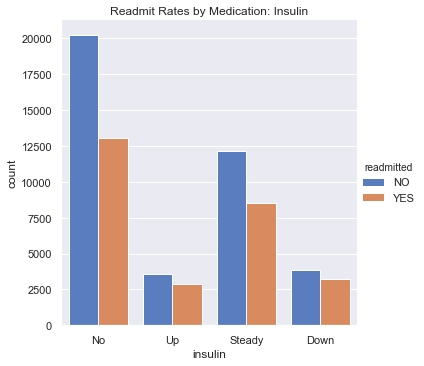

In [88]:
sns.catplot(x='insulin', hue='readmitted', kind='count', palette='muted', data=diabetes)
plt.title('Readmit Rates by Medication: Insulin')
plt.show()

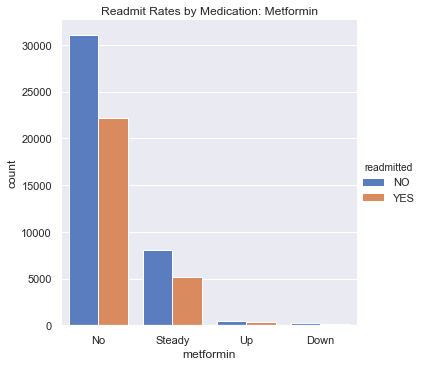

In [89]:
sns.catplot(x='metformin', hue='readmitted', kind='count', palette='muted', data=diabetes)
plt.title('Readmit Rates by Medication: Metformin')
plt.show()

In [90]:
diabetes = diabetes.reset_index(drop=True)

In [91]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67684 entries, 0 to 67683
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      67684 non-null  object
 1   gender                    67684 non-null  object
 2   age                       67684 non-null  object
 3   discharge_disposition_id  67684 non-null  object
 4   admission_source_id       67684 non-null  int64 
 5   time_in_hospital          67684 non-null  int64 
 6   num_lab_procedures        67684 non-null  int64 
 7   num_procedures            67684 non-null  int64 
 8   num_medications           67684 non-null  int64 
 9   num_outpatient            67684 non-null  int64 
 10  num_emergency             67684 non-null  int64 
 11  num_inpatient             67684 non-null  int64 
 12  diag_1                    67684 non-null  object
 13  diag_2                    67684 non-null  object
 14  diag_3                

In [92]:
# save cleaned dataset to new file
# diabetes.to_csv('diabetes_visual.csv')